In [140]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [141]:
data_house=pd.read_csv('C:/Users/dell/Desktop/adsaada/Housing-prediction/Housing.csv')
data_house=data_house[['area','price']]
data_house
data_house['area'].ndim

X=data_house[['area']]   # input values/independent/ 
Y=data_house['price']    # output/dependent/target valus
X.ndim,Y.ndim


(2, 1)

In [144]:
X.isnull().sum(),Y.isnull().sum()

(area    0
 dtype: int64,
 np.int64(0))

In [ ]:
#f,ax=plt.subplots(1,2,figsize=(2,4))

<Axes: >

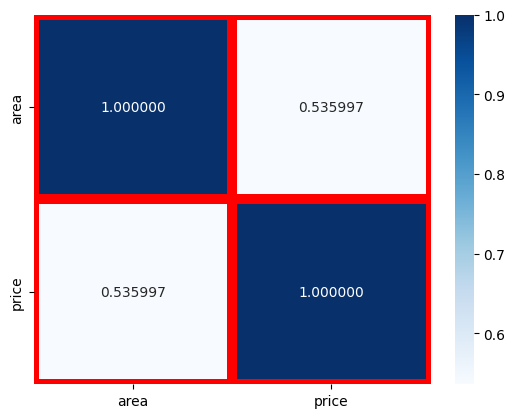

In [142]:
#Make corellation  matrix 
area_price_corr=data_house.corr()
sns.heatmap(area_price_corr,annot=True,cmap='Blues',fmt='2f',linewidths=6,linecolor='red',edgecolor='blue')

In [143]:
#split data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,random_state=42)

In [144]:
# Train model
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

Make  folder to save the model

In [145]:
import os
folderName="model1_area_price"
# folderpath='C:/Users/dell/Desktop/adsaada/Housing-prediction/Housing-prediction'+folderName
if not os.path.exists(folderName):
    os.mkdir(folderName)
    print("the  folder is  make")
else:
    print("alreday there")


alreday there


saving model to folder that is created

In [146]:
fileName='model1_area_price/linear_area_price.sav'
pickle.dump(model,open(fileName,'wb'))

loading model to disk

In [147]:
# load the model from disk
loaded_model = pickle.load(open(fileName, 'rb'))
result = loaded_model.predict([[7420]])
print(result)

[5671169.69114511]


c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [26]:
# Create a list of lists with values to predict
values_to_predict = [[70000], [68000], [7020], [100085]]

# Make predictions for each set of values
predictions = loaded_model.predict(values_to_predict)

# Print the predictions
for i, value in enumerate(values_to_predict):
    print(f"Input: {value}, Prediction: {predictions[i]}")

Input: [70000], Prediction: 32313343.199674144
Input: [68000], Prediction: 31461883.51579658
Input: [7020], Prediction: 5500877.7543696
Input: [100085], Prediction: 45121425.49440242


c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [148]:
X_train,Y_train

(     area
 46   6000
 93   7200
 335  3816
 412  2610
 471  3750
 ..    ...
 71   6000
 106  5450
 270  4500
 435  4040
 102  5500
 
 [436 rows x 1 columns],
 46     7525000
 93     6300000
 335    3920000
 412    3430000
 471    3010000
         ...   
 71     6755000
 106    6160000
 270    4340000
 435    3290000
 102    6195000
 Name: price, Length: 436, dtype: int64)

In [149]:
#predict on test
Y_predict_test=model.predict(X_test)
#model evaluation
print("R2 error",r2_score(Y_test,Y_predict_test))

R2 error 0.27287851871974644


In [150]:
# view y intercepr and slope
model.intercept_,model.coef_[0]

(np.float64(2512254.2639593435), np.float64(425.72984193878284))

In [28]:
Y_predict=model.predict(X_test)
Y_predict

array([5024060.33139816, 5279498.23656143, 4232202.82539203,
       4640903.47365326, 4198144.43803692, 5373158.80178796,
       6139472.51727777, 4636646.17523387, 3891618.951841  ,
       3661724.83719406, 6165016.3077941 , 4187075.46214652,
       4095969.27597162, 3832016.77396957, 4202401.73645631,
       4057653.59019713, 3363713.94783691, 5066633.31559204,
       5002773.83930122, 5066633.31559204, 4649418.07049203,
       5417860.43519154, 4065742.45719396, 4130027.66332672,
       6024525.4599543 , 6752523.48966962, 3827759.47555018,
       3789443.78977569, 8131888.17755128, 3789443.78977569,
       4215173.63171447, 3840531.37080835, 5066633.31559204,
       5328457.16838439, 4545114.25921703, 4470611.53687774,
       4490195.10960693, 3866075.16132467, 3993794.11390631,
       3698763.33344273, 5909578.40263083, 4057653.59019713,
       5245439.84920633, 4300319.60010223, 5385930.69704613,
       5017674.38376908, 5066633.31559204, 4487640.7305553 ,
       5939379.49156655,

In [151]:
model.predict([[7420]])


c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5671169.69114511])

In [36]:
y=model.intercept_+model.coef_*7420
y

array([5671169.69114511])

visulation of trainning data

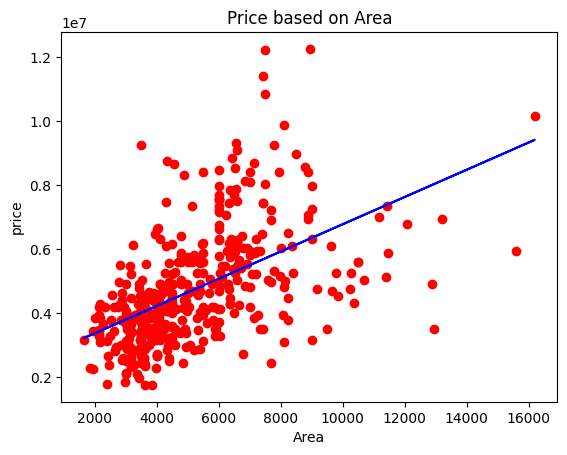

In [154]:
plt.scatter(X_train,Y_train,color='red')
plt.plot(X_train,model.predict(X_train),color='blue')
plt.title("Price based on Area")
plt.xlabel("Area")
plt.ylabel("price")
plt.show()

Text(0, 0.5, 'price')

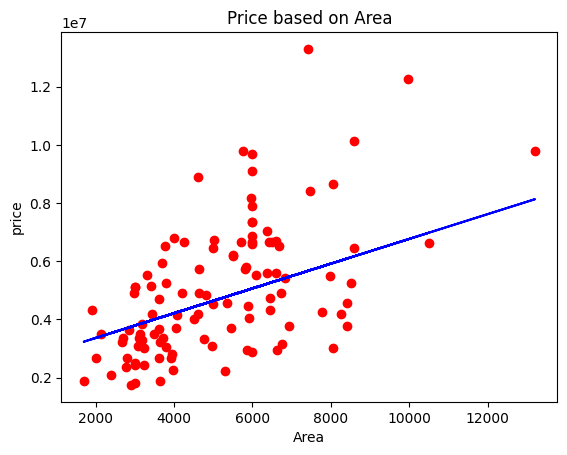

In [156]:
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_test,model.predict(X_test),color='blue')
plt.title("Price based on Area")
plt.xlabel("Area")
plt.ylabel("price")

In [ ]:
model.intercept_,model.coef_
model.predict([[4900]])

In [194]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


<h1> price based on area , bathrooms, bedrooms,stores</h1> 

In [84]:
Y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [195]:
Data_House_ABSP=pd.read_csv('C:/Users/dell/Desktop/adsaada/Housing-prediction/Housing.csv')
Data_House_ABSP.value_counts()
Data_House_ABSP.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [196]:
Data_House_ABSP=Data_House_ABSP[['price','area','bedrooms','bathrooms','stories']]
Data_House_ABSP

,price,area,bedrooms,bathrooms,stories
0,13300000,7420,4,2,3
1,12250000,8960,4,4,4
2,12250000,9960,3,2,2
3,12215000,7500,4,2,2
4,11410000,7420,4,1,2
...,...,...,...,...,...
540,1820000,3000,2,1,1
541,1767150,2400,3,1,1
542,1750000,3620,2,1,1
543,1750000,2910,3,1,1


<Axes: >

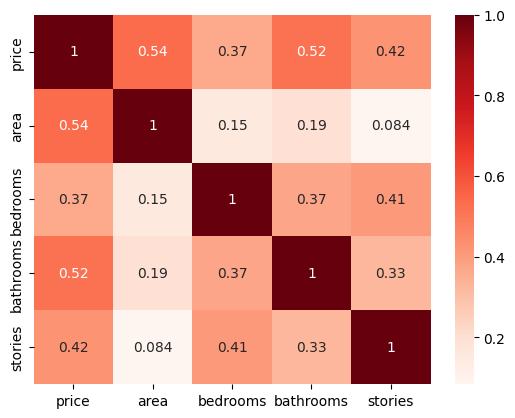

In [197]:
housingprice=Data_House_ABSP.corr()
sns.heatmap(housingprice,annot=True,cmap='Reds')

In [199]:
x=Data_House_ABSP[['area','bedrooms','bathrooms','stories']]
y=Data_House_ABSP['price']
x,y

(     area  bedrooms  bathrooms  stories
 0    7420         4          2        3
 1    8960         4          4        4
 2    9960         3          2        2
 3    7500         4          2        2
 4    7420         4          1        2
 ..    ...       ...        ...      ...
 540  3000         2          1        1
 541  2400         3          1        1
 542  3620         2          1        1
 543  2910         3          1        1
 544  3850         3          1        2
 
 [545 rows x 4 columns],
 0      13300000
 1      12250000
 2      12250000
 3      12215000
 4      11410000
          ...   
 540     1820000
 541     1767150
 542     1750000
 543     1750000
 544     1750000
 Name: price, Length: 545, dtype: int64)

Datasplit

In [200]:
x_test,x_train,y_test,y_train=train_test_split(x,y,train_size=0.8,random_state=42)

model train

In [201]:
model=LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

In [57]:
#predict and evaluate
y_predict=model.predict(x_test)
y_predict

array([ 7487384.47036423,  6120888.55677373,  3031284.92887351,
        3391292.13598018,  3988094.49204976,  4647718.14875825,
        4040445.57591551,  4017366.89078313,  3024790.34068846,
        4511561.12247584,  3658282.66369552,  5064601.02621935,
        5024601.74436022,  3893862.5410914 ,  3269003.05785547,
        5728255.42778058,  2616451.88653558,  5452676.26852556,
        5246570.33995101,  9672217.8363367 ,  6152299.20709318,
        3595461.36305661,  5412088.18142969,  6422419.89180727,
        7762227.66065944,  3935743.40818401,  2936529.46707649,
        3454069.22838763,  4433302.07106302,  3986168.69858484,
        3867686.99915853,  1994733.4683316 ,  3673987.98885524,
        4998470.41065879,  3812762.56933094,  5274005.36168236,
        3090965.16448046,  6377453.07594737,  5178613.25542163,
        8340351.1465273 ,  8403751.07426951,  6457139.85704838,
        5145053.4454829 ,  3532640.06241771,  5027999.47574477,
        3846746.56561223,  7921630.89206

In [202]:
r2_score(y_test,y_predict)

0.47116650048687014

In [15]:
y_predicts=model.predict(x_test)
y_predicts

array([ 7487384.47036423,  6120888.55677373,  3031284.92887351,
        3391292.13598018,  3988094.49204976,  4647718.14875825,
        4040445.57591551,  4017366.89078313,  3024790.34068846,
        4511561.12247584,  3658282.66369552,  5064601.02621935,
        5024601.74436022,  3893862.5410914 ,  3269003.05785547,
        5728255.42778058,  2616451.88653558,  5452676.26852556,
        5246570.33995101,  9672217.8363367 ,  6152299.20709318,
        3595461.36305661,  5412088.18142969,  6422419.89180727,
        7762227.66065944,  3935743.40818401,  2936529.46707649,
        3454069.22838763,  4433302.07106302,  3986168.69858484,
        3867686.99915853,  1994733.4683316 ,  3673987.98885524,
        4998470.41065879,  3812762.56933094,  5274005.36168236,
        3090965.16448046,  6377453.07594737,  5178613.25542163,
        8340351.1465273 ,  8403751.07426951,  6457139.85704838,
        5145053.4454829 ,  3532640.06241771,  5027999.47574477,
        3846746.56561223,  7921630.89206

In [203]:
model.predict([[7420,4,2,7]])
# Data_House_ABSP.columns

c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([10551937.0864386])

<h2>Area and their prices</h2>

In [117]:
# plt.figure(figsize=(10,6))
# plt.scatter(x_train[['area']],y_train,color='red')
# plt.plot(x_train[['area']],model.predict(x_train[['area','bedrooms','bathrooms','stories']]),color='green')
# plt.title("Price based on Area")
# plt.xlabel("Area")
# plt.ylabel("price")
# plt.show()
# plt.figure(figsize=(10,6))
# plt.scatter(x_train[['stories']],y_train,color='red')
# plt.plot(x_train[['stories']],model.predict(x_train[['area','bedrooms','bathrooms','stories']]),color='green')
# plt.title("Price based on stories")
# plt.xlabel("Area")
# plt.ylabel("price")
# plt.show()
# plt.figure(figsize=(10,6))
# plt.scatter(x_train[['bedrooms']],y_train,color='red')
# plt.plot(x_train[['bedrooms']],model.predict(x_train[['area','bedrooms','bathrooms','stories']]),color='green')
# plt.title("Price based on bedrooms")
# plt.xlabel("Area")
# plt.ylabel("price")
# plt.show()
# plt.figure(figsize=(10,6))
# plt.scatter(x_train['bathrooms'],y_train,color='red')
# plt.plot(x_train['bathrooms'],model.predict(x_train[['area','bedrooms','bathrooms','stories']]),color='green')
# plt.title("Price based on bathrooms")
# plt.xlabel("Area")
# plt.ylabel("price")
# plt.show()


# Data_House_ABSP.columns
# Data_House_ABSP['bedrooms'].value_counts()
# Data_House_ABSP['bedrooms'].min(),Data_House_ABSP['bedrooms'].max()

area and pricce without hamperig other function  visualization of Training data

c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


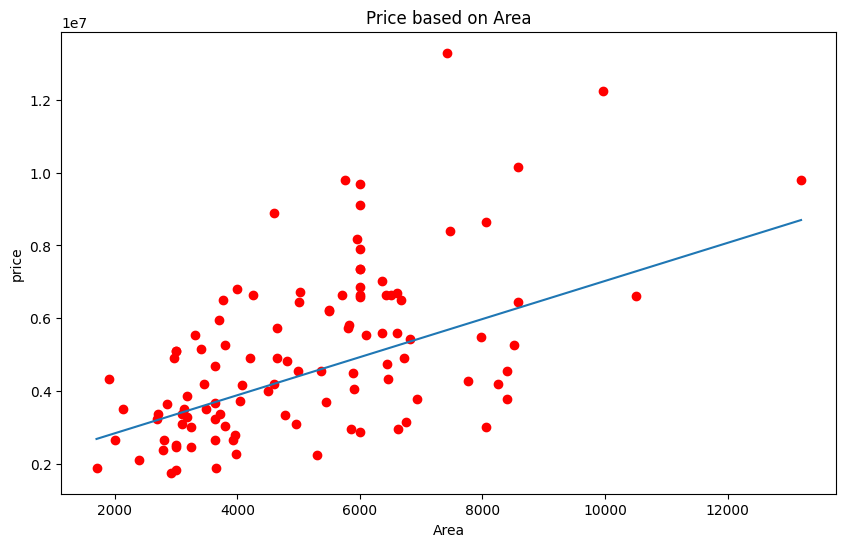

np.int64(16200)

In [221]:
plt.figure(figsize=(10,6))
plt.scatter(x_train['area'],y_train,color='red')
area_range=np.linspace(x_train['area'].min(),x_train['area'].max(),2)
predicted_area=model.predict(np.column_stack([area_range,np.full_like
                                              (area_range,x_train['bathrooms'].mean()),
                                              np.full_like(area_range,x_train['bathrooms'].mean()),
                                              np.full_like(area_range,x_train['stories'].mean())]))

#linespace  is used to generate the sequence number over the range, start,stop, num
#(full_like) function returns a new array having the same shape along the type as the given howerer filled with a specific value. 
# want to create an array which matches the shape of other array but with constant values.
#(column_stack)commonly used when you want to combine multiple 1D arrays into one 2D array (passed to the model for prediction).

plt.plot(area_range,predicted_area)
plt.title("Price based on Area")
plt.xlabel("Area")
plt.ylabel("price")
plt.show()
Data_House_ABSP['area'].value_counts()
Data_House_ABSP['area'].value_counts()[6000]
Data_House_ABSP['area'].min()
Data_House_ABSP['area'].max()

In [205]:
Data_House_ABSP.columns
y=model.intercept_+ model.coef_[0] *49000
y

np.float64(24376194.434364494)

<h2>Bedrooms and their prices</h2>

price along area with others

bedroom and price

c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


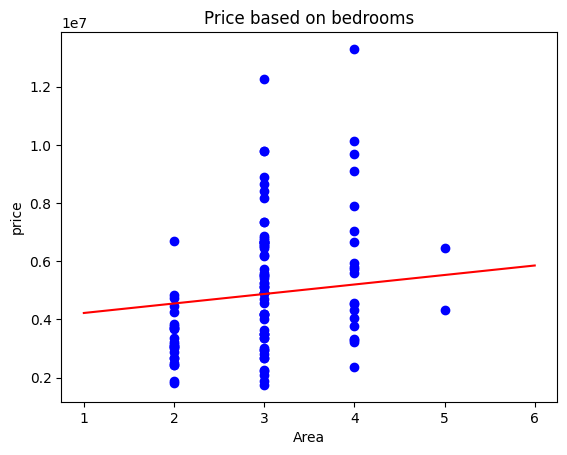

In [ ]:
plt.scatter(x_train['bedrooms'],y_train,color='blue')
# #linespace  is used to generate the sequence number over the range, start,stop, num
bedrooms_range=np.linspace(x_train['bedrooms'].min(),x_train['bedrooms'].max(),100)
predict_bathrooms=model.predict(np.column_stack([np.full_like(bedrooms_range,x['area'].mean()),
                                bedrooms_range,
                                 np.full_like(bedrooms_range,x_train['bathrooms'].mean()),
                                  np.full_like(bedrooms_range,x_train['stories'].mean())]))
plt.plot(bedrooms_range,predict_bathrooms,color='red')
plt.title("Price based on bedrooms")
plt.xlabel("Area")
plt.ylabel("price")
plt.show()


bathrooms and price (constant other )

c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


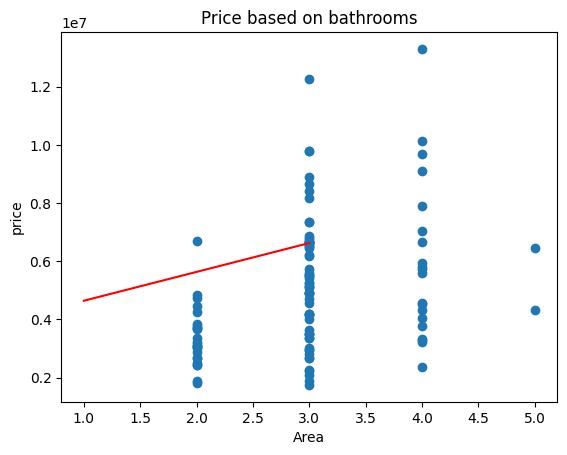

In [222]:
bathrooms_range=np.linspace(x_train['bathrooms'].min(),x_train['bathrooms'].max(),1000)
bathrooms_predicy=model.predict(np.column_stack([np.full_like(bathrooms_range,x_train['area'].mean()),
                                                 np.full_like(bathrooms_range,x_train['bedrooms'].mean()),
                                                 bathrooms_range,
                                                 np.full_like(bathrooms_range,x_train['stories'].mean())]))
plt.scatter(x_train['bedrooms'],y_train)
plt.plot(bathrooms_range,bathrooms_predicy,linestyle='-',color='red')
plt.title("Price based on bathrooms")
plt.xlabel("Area")
plt.ylabel("price")
plt.show()

In [49]:
x.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories'], dtype='object')

price based on stories

c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


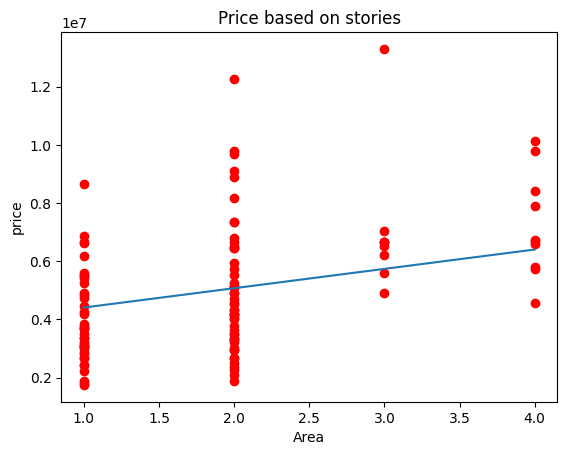

In [223]:
plt.scatter(x_train['stories'],y_train,color='red')
stories_range=np.linspace(x_train['stories'].min(),x_train['stories'].max(),100)
predict_stories=model.predict(np.column_stack([np.full_like(stories_range,x_train['area'].mean()),
                                               np.full_like(stories_range,x_train['bedrooms'].mean()),
                                               np.full_like(stories_range,x_train['bathrooms'].mean()),
                                               stories_range]))
plt.plot(stories_range,predict_stories)
plt.title("Price based on stories")
plt.xlabel("Area")
plt.ylabel("price")
plt.show()

save model in disk

In [209]:
filenames='model1_area_price/linear_area_prices.sav'
pickle.dump(model,open(filenames,'wb'))


load 

In [210]:
loaded=pickle.load(open(filenames,'rb'))
predict_ABBS=loaded.predict([[7024,2,3,5]])
predict_ABBS

c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9353488.88195692])

testing data visualization

c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


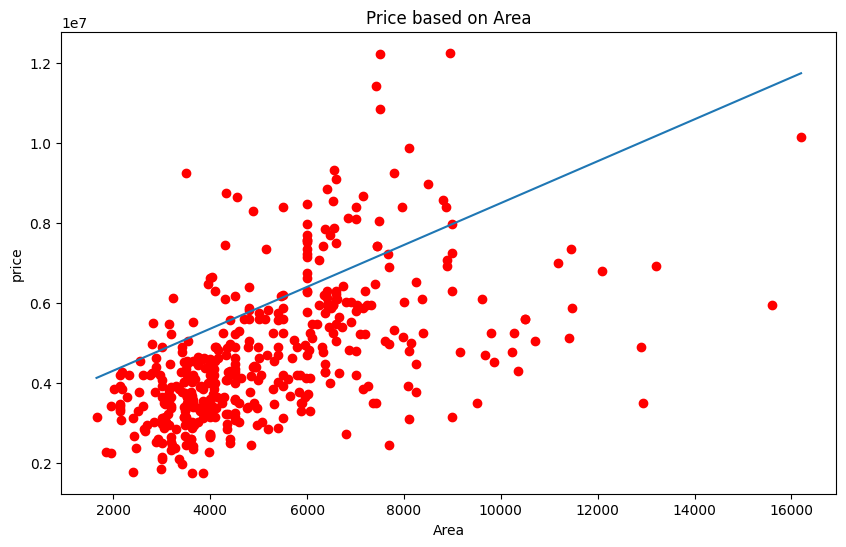

c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


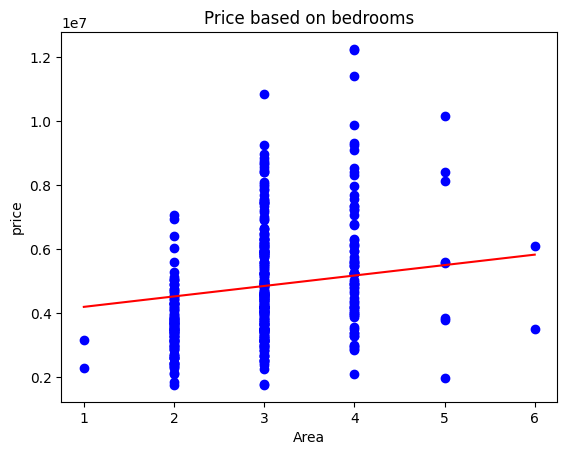

c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


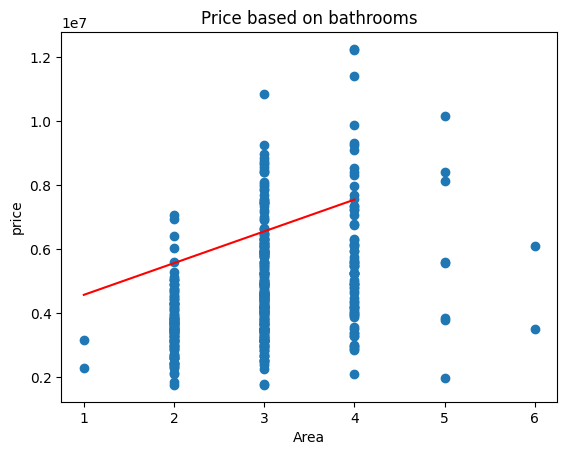

c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


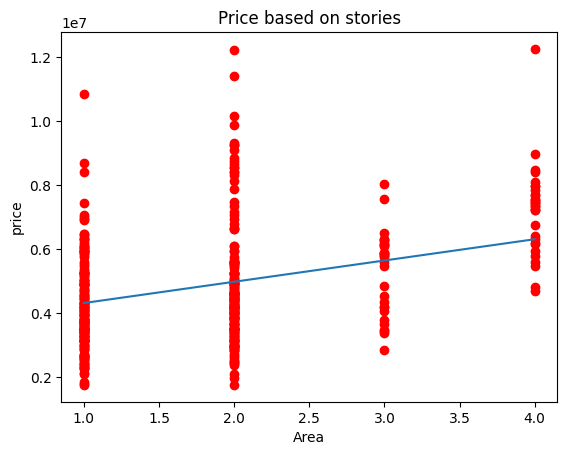

In [224]:
#area and price
plt.figure(figsize=(10,6))
plt.scatter(x_test['area'],y_test,color='red')
area_range=np.linspace(x_test['area'].min(),x_test['area'].max(),2)
predicted_area=model.predict(np.column_stack([area_range,np.full_like
                                              (area_range,x_test['bathrooms'].mean()),
                                              np.full_like(area_range,x_test['bedrooms'].mean()),
                                              np.full_like(area_range,x_test['stories'].mean())]))

#linespace  is used to generate the sequence number over the range, start,stop, num
#(full_like) function returns a new array having the same shape along the type as the given howerer filled with a specific value. 
# want to create an array which matches the shape of other array but with constant values.
#(column_stack)commonly used when you want to combine multiple 1D arrays into one 2D array (passed to the model for prediction).

plt.plot(area_range,predicted_area)
plt.title("Price based on Area")
plt.xlabel("Area")
plt.ylabel("price")
plt.show()

#bedrooms and price
plt.scatter(x_test['bedrooms'],y_test,color='blue')
# #linespace  is used to generate the sequence number over the range, start,stop, num
bedrooms_range=np.linspace(x_test['bedrooms'].min(),x_test['bedrooms'].max(),100)
predict_bathrooms=model.predict(np.column_stack([np.full_like(bedrooms_range,x_test['area'].mean()),
                                bedrooms_range,
                                 np.full_like(bedrooms_range,x_test['bathrooms'].mean()),
                                  np.full_like(bedrooms_range,x_test['stories'].mean())]))
plt.plot(bedrooms_range,predict_bathrooms,color='red')
plt.title("Price based on bedrooms")
plt.xlabel("Area")
plt.ylabel("price")
plt.show()

#bathrooms and price
bathrooms_range=np.linspace(x_test['bathrooms'].min(),x_test['bathrooms'].max(),1000)
bathrooms_predicy=model.predict(np.column_stack([np.full_like(bathrooms_range,x_test['area'].mean()),
                                                 np.full_like(bathrooms_range,x_test['bedrooms'].mean()),
                                                 bathrooms_range,
                                                 np.full_like(bathrooms_range,x_test['stories'].mean())]))
plt.scatter(x_test['bedrooms'],y_test)
plt.plot(bathrooms_range,bathrooms_predicy,linestyle='-',color='red')
plt.title("Price based on bathrooms")
plt.xlabel("Area")
plt.ylabel("price")
plt.show()

#stories and price
plt.scatter(x_test['stories'],y_test,color='red')
stories_range=np.linspace(x_test['stories'].min(),x_test['stories'].max(),100)
predict_stories=model.predict(np.column_stack([np.full_like(stories_range,x_test['area'].mean()),
                                               np.full_like(stories_range,x_test['bedrooms'].mean()),
                                               np.full_like(stories_range,x_test['bathrooms'].mean()),
                                               stories_range]))
plt.plot(stories_range,predict_stories)
plt.title("Price based on stories")
plt.xlabel("Area")
plt.ylabel("price")
plt.show()

list for to predict the price

In [212]:
predict_datas_ABBS=[[1234,3,7,9],[30000,12,45,10],[7420,4,2,3],[11440,4,1,2],[7420,30,10,8]]
test_data=loaded.predict(predict_datas_ABBS)
for i,value in enumerate(predict_datas_ABBS):
    print(f"area-bathrooms-bedrooms-stories{value} ,predicted price: {test_data[i]}")

area-bathrooms-bedrooms-stories[1234, 3, 7, 9] ,predicted price: 13274769.903365051
area-bathrooms-bedrooms-stories[30000, 12, 45, 10] ,predicted price: 69617326.90624057
area-bathrooms-bedrooms-stories[7420, 4, 2, 3] ,predicted price: 7892325.1931325495
area-bathrooms-bedrooms-stories[11440, 4, 1, 2] ,predicted price: 8340351.146527298
area-bathrooms-bedrooms-stories[7420, 30, 10, 8] ,predicted price: 27637433.152450785


c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


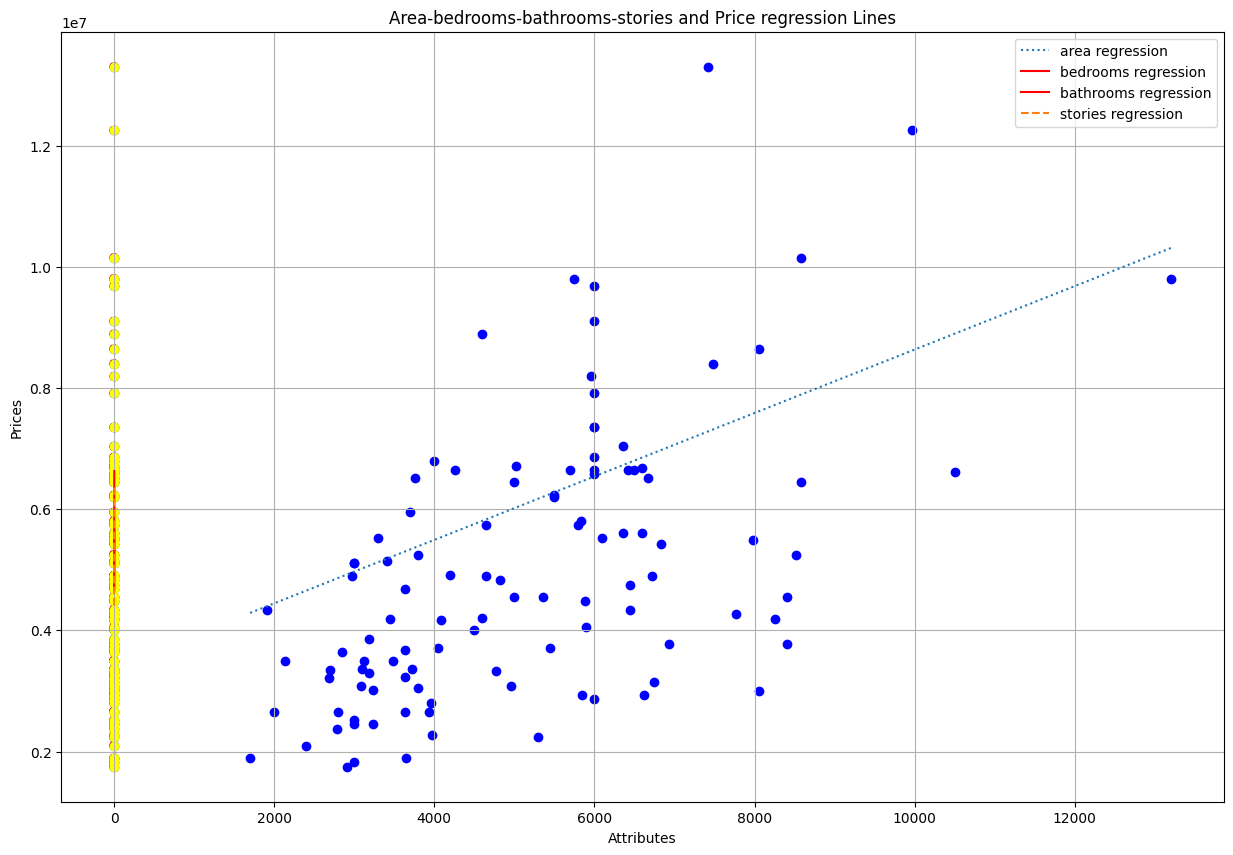

In [218]:
plt.figure(figsize=(15,10))
area_ranges=np.linspace(x_train['area'].min(),x_train['area'].max(),2)
predicted_areas=model.predict(np.column_stack([area_ranges,np.full_like(area_ranges,x_train['bathrooms'].mean()),
                                              np.full_like(area_ranges,x_train['bedrooms'].mean()),
                                              np.full_like(area_ranges,x_train['stories'].mean())]))

bedrooms_ranges=np.linspace(x_train['bedrooms'].min(),x_train['bedrooms'].max(),100)
predict_bathroomss=model.predict(np.column_stack([np.full_like(bedrooms_ranges,x_train['area'].mean()),
                                bedrooms_ranges,
                                 np.full_like(bedrooms_ranges,x_train['bathrooms'].mean()),
                                  np.full_like(bedrooms_ranges,x_train['stories'].mean())]))

bathrooms_ranges=np.linspace(x_train['bathrooms'].min(),x_train['bathrooms'].max(),1000)
bathrooms_predicys=model.predict(np.column_stack([np.full_like(bathrooms_ranges,x_train['area'].mean()),
                                                 np.full_like(bathrooms_ranges,x_train['bedrooms'].mean()),
                                                 bathrooms_ranges,
                                                 np.full_like(bathrooms_ranges,x_train['stories'].mean())]))

stories_ranges=np.linspace(x_train['stories'].min(),x_train['stories'].max(),100)
predict_storiess=model.predict(np.column_stack([np.full_like(stories_ranges,x_train['area'].mean()),
                                               np.full_like(stories_ranges,x_train['bedrooms'].mean()),
                                               np.full_like(stories_ranges,x_train['bathrooms'].mean()),
                                               stories_ranges]))

plt.scatter(x_train['area'],y_train,color='blue')
plt.plot(area_ranges,predicted_areas,linestyle=':',label='area regression')
plt.scatter(x_train[['bathrooms']],y_train,linestyle='-.',color='red')
plt.plot(bedrooms_ranges,predict_bathroomss,color='red',label='bedrooms regression')
plt.scatter(x_train[['bedrooms']],y_train,color='green')
plt.plot(bathrooms_ranges,bathrooms_predicys,linestyle='-',color='red',label='bathrooms regression')
plt.scatter(x_train[['stories']],y_train,color='yellow')
plt.plot(stories_ranges,predict_storiess,linestyle='--',label='stories regression')
plt.legend()
plt.title('Area-bedrooms-bathrooms-stories and Price regression Lines')
plt.xlabel('Attributes')
plt.ylabel('Prices')
plt.grid(True)
plt.show()

In [225]:
predict_datas_ABBS=[[1234,3,7,9],[30000,12,45,10],[7420,4,2,3],[11440,4,1,2],[7420,30,10,8]]
test_data=loaded.predict(predict_datas_ABBS)
for i,value in enumerate(predict_datas_ABBS):
    print(f"area-bathrooms-bedrooms-stories{value} ,predicted price: {test_data[i]}")

area-bathrooms-bedrooms-stories[1234, 3, 7, 9] ,predicted price: 13274769.903365051
area-bathrooms-bedrooms-stories[30000, 12, 45, 10] ,predicted price: 69617326.90624057
area-bathrooms-bedrooms-stories[7420, 4, 2, 3] ,predicted price: 7892325.1931325495
area-bathrooms-bedrooms-stories[11440, 4, 1, 2] ,predicted price: 8340351.146527298
area-bathrooms-bedrooms-stories[7420, 30, 10, 8] ,predicted price: 27637433.152450785


c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
